## Analyze A/B Test Results

You may either submit your notebook through the workspace here, or you may work from your local machine and submit through the next page.  Either way assure that your code passes the project [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).  **Please save regularly.**

This project will assure you have mastered the subjects covered in the statistics lessons.  The hope is to have this project be as comprehensive of these topics as possible.  Good luck!

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

**As you work through this notebook, follow along in the classroom and answer the corresponding quiz questions associated with each question.** The labels for each classroom concept are provided for each question.  This will assure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the criteria.  As a final check, assure you meet all the criteria on the [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [2]:
df = pd.read_csv('ab_data.csv')
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


In [3]:
df.describe()

,user_id,converted
count,294478.000000,294478.000000
mean,787974.124733,0.119659
std,91210.823776,0.324563
min,630000.000000,0.000000
25%,709032.250000,0.000000
50%,787933.500000,0.000000
75%,866911.750000,0.000000
max,945999.000000,1.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 5 columns):
user_id         294478 non-null int64
timestamp       294478 non-null object
group           294478 non-null object
landing_page    294478 non-null object
converted       294478 non-null int64
dtypes: int64(2), object(3)
memory usage: 11.2+ MB


b. Use the cell below to find the number of rows in the dataset.

In [5]:
df.count()

user_id         294478
timestamp       294478
group           294478
landing_page    294478
converted       294478
dtype: int64

c. The number of unique users in the dataset.

In [6]:
df.user_id.nunique()

290584

d. The proportion of users converted.

In [7]:
df[df.converted == 1].nunique() / df['user_id'].nunique()

user_id         0.121042
timestamp       0.121263
group           0.000007
landing_page    0.000007
converted       0.000003
dtype: float64

e. The number of times the `new_page` and `treatment` don't match.

In [8]:
len(df.query("group == 'control' & landing_page == 'new_page' | group == 'treatment' & landing_page == 'old_page'"))

3893

f. Do any of the rows have missing values?

In [9]:
df.isna().sum()

user_id         0
timestamp       0
group           0
landing_page    0
converted       0
dtype: int64

`2.` For the rows where **treatment** does not match with **new_page** or **control** does not match with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to figure out how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [10]:
df2 = df.query("group == 'control' & landing_page == 'old_page' | group == 'treatment' & landing_page == 'new_page'")

In [11]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [12]:
df2.user_id.nunique()

290584

b. There is one **user_id** repeated in **df2**.  What is it?

In [13]:
df2["user_id"][df2.duplicated("user_id")]

2893    773192
Name: user_id, dtype: int64

c. What is the row information for the repeat **user_id**? 

In [14]:
df2[df2.duplicated("user_id")]

,user_id,timestamp,group,landing_page,converted
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [15]:
df2 = df2.drop_duplicates("user_id")

`4.` Use **df2** in the cells below to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [17]:
len(df2[df2['converted'] ==1])/len(df2)

0.11959708724499628

b. Given that an individual was in the `control` group, what is the probability they converted?

In [18]:
len(df2.query(" group == 'control' & converted == 1 ")) / len(df2.query(" group == 'control' "))

0.1203863045004612

c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [19]:
len(df2.query(" group == 'treatment' & converted == 1 ")) / len(df2.query(" group == 'treatment' "))

0.11880806551510564

d. What is the probability that an individual received the new page?

In [20]:
len(df2.query(" landing_page == 'new_page' ")) / len(df2)

0.5000619442226688

e. Consider your results from parts (a) through (d) above, and explain below whether you think there is sufficient evidence to conclude that the new treatment page leads to more conversions.

**Your answer goes here.**
The above analysis stated that the conversion rate for the `treatment group` is bit lower then from the `control group`. So we did't find a clear proof so say that the `treatment page` will lead towards more `conversions`.

Now question which comes in mind that how should we handle the rows where the `landing_page` and `group` columns don't match. The answer for this question is that we should drop these rows as we should only use these rows where we can feel confident in the accuracy of the data.

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

**Put your answer here.**

$H_{0}: p_{new} \leq p_{old}$

$H_{1}: p_{new} > p_{old}$

Here $p_{new}$ and $p_{old}$ are the converted rates for new page and old page respectively.

`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

a. What is the **conversion rate** for $p_{new}$ under the null? 

In [21]:
p_new = len(df2[df2["converted"] == 1]) / len(df2)
p_new

0.11959708724499628

b. What is the **conversion rate** for $p_{old}$ under the null? <br><br>

In [22]:
p_old = len(df2[df2["converted"] == 1]) / len(df2)
p_old

0.11959708724499628

c. What is $n_{new}$, the number of individuals in the treatment group?

In [23]:
n_new = len(df2[df2["landing_page"] == 'new_page'])
n_new

145310

d. What is $n_{old}$, the number of individuals in the control group?

In [24]:
n_old = len(df2[df2["landing_page"] == 'old_page'])
n_old

145274

e. Simulate $n_{new}$ transactions with a conversion rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [25]:
new_page_converted = np.random.binomial(n_new, p_new) / n_new

f. Simulate $n_{old}$ transactions with a conversion rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [26]:
old_page_converted = np.random.binomial(n_old, p_old) / n_old

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [27]:
print(new_page_converted - old_page_converted)

0.0019593007367707804


h. Create 10,000 $p_{new}$ - $p_{old}$ values using the same simulation process you used in parts (a) through (g) above. Store all 10,000 values in a NumPy array called **p_diffs**.

In [28]:
# Here is 10000 simulations for p_new and p_old difference

p_diffs = []
for i in range (0,10000):
    new_page_converted = np.random.choice([0,1], p=[0.8805, 0.1195], size=[1,n_new])
    old_page_converted = np.random.choice([0,1], p=[0.8805, 0.1195], size=[1,n_old])
    p_diffs.append(new_page_converted.mean() - old_page_converted.mean())

In [29]:
# Now let's put simulated data into numpy array
p_diffs = np.array(p_diffs)

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

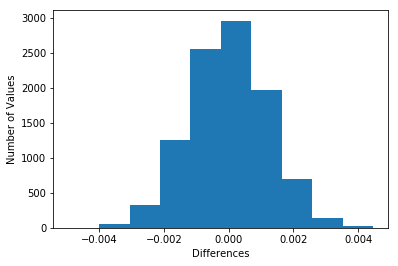

In [30]:
# Now Plot a Histogram for Simulated Data.
plt.hist(p_diffs);
plt.xlabel("Differences");
plt.ylabel("Number of Values");

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [31]:
 
p_diffs_treatment = len(df2.query("group == 'treatment' & converted == 1"))/len(df2.query("group == 'treatment'")) 
p_diffs_control = len(df2.query("group == 'control' & converted == 1"))/len(df2.query("group == 'control'"))

# Calculate difference between two observations.
p_diffs_obs = p_diffs_treatment - p_diffs_control

(p_diffs > p_diffs_obs).mean()


0.90610000000000002

**k**. Please explain using the vocabulary you've learned in this course what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

**Put your answer here.**

This value is called `p-value` in scientific studies. let's assume that $H_{0}$ is true then the probability of obtainint the difference that is equal to or will be more high then what we observed the difference for $H_{1}$. 

In our current scenario, as $H_{1}$ is $p_{new} > p_{old}$, is **more hight** means that any simulated differences which is higher then the observed difference as `p_diff_obs`. As we got p-value greater then the designated type-1 error rate for 5%. It clearly means that we fail to reject $H_{0}$.

**l**. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](https://docs.w3cub.com/statsmodels/generated/statsmodels.stats.proportion.proportions_ztest/) is a helpful link on using the built in.

In [32]:
import statsmodels.api as sm

/opt/conda/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [33]:
convert_old = len(df2.query("landing_page == 'old_page' & converted == 1"))
convert_new = len(df2.query("landing_page == 'new_page' & converted == 1"))

n_old = len(df2[df2["landing_page"] == "old_page" ])
n_new = len(df2[df2["landing_page"] == "new_page" ])

In [34]:
sm.stats.proportions_ztest([convert_new, convert_old], [n_new, n_old], alternative='larger')

(-1.3109241984234394, 0.90505831275902449)

n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

**Put your answer here.**

As we know that the normal distribution is centered on 0 which means that $p_{new} = p_{old}$ at that point. The z-score we got is `-1.3109` which is the number of SD (standard deviation) bellow the mean for the observed difference `p_diff_obs`. I mentiioned above that, we got p-value greater then the designated type-1 error rate for 5%. It clearly means that we fail to reject $H_{0}$. In Addition, the z-score we calculate `-1.3109` and the p-value we calculated `0.9050` also making our fingiing true which we mentioned above.

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you achieved in the A/B test in Part II above can also be achieved by performing regression.<br><br> 

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

**Put your answer here.**

Now I'll be using statsmodels to fit the **logistic regression**.

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives. However, you first need to create in df2 a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [35]:
df2["intercept"] = 1

# generate dummy data.
df2[["drop", "ab_page"]] = pd.get_dummies(df2["group"])

# all drop extra drop column
df2.drop("drop", axis=1, inplace=True)

# printing first 5 entries from dataset.
df2.head()

,user_id,timestamp,group,landing_page,converted,intercept,ab_page
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0


c. Use **statsmodels** to instantiate your regression model on the two columns you created in part b., then fit the model using the two columns you created in part **b.** to predict whether or not an individual converts. 

In [36]:
# by using statsmodels now I'll find log first then check fit.
log_mod = sm.Logit(df2["converted"], df2[["intercept", "ab_page"]])
results = log_mod.fit()
print(results)

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [37]:
# chisqprob was giving me an error and results.summary() was not running. So I'm adding missing function chisqprob by myself.
from scipy import stats
stats.chisqprob = lambda chisq, df2: stats.chi2.sf(chisq, df2)
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290582
Method:                           MLE   Df Model:                            1
Date:                Wed, 16 Sep 2020   Pseudo R-squ.:               8.077e-06
Time:                        06:40:58   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1899
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9888      0.008   -246.669      0.000      -2.005      -1.973
ab_page       -0.0150      0.011     -1.311      0.190      -0.037       0.007
==============================================================================
"""

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in **Part II**?

**Put your answer here.**

The p-value associated with `ab_page` is 0.190. 

Yes it is different from the p-value in **Part II** as in **Part II**, $H_{1}$ was $p_{new} > p_{old}$, and it was using one-tailed p-value. And logically we are testing different hypothesis. Here in Logistic Regression we are using 2 tailes p-valies values. we are failing to reject $H_{0}$ and we concluded that the new page is not a variable whcih can affects conversion rates.

f. **Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?**

**Put your answer here.**

Yes it is a good idea to consider some other factors too. By addiing them into regression model we get an idea that there is a possibility some other factors may impact people to convert or not. For instance, all the converted users may have some common characteristics. This scenario will allow us to understand audience more and the difference between new and old pages too.

A disadvantage of adding additional terms into regression model is that sometimes it leads some misleading results like in cases of multicollinearity.

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives in. You will need to read in the **countries.csv** dataset and merge together your datasets on the appropriate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy variables.** Provide the statistical output as well as a written response to answer this question.

In [44]:
#import countries.csv file and read what kind of data it contains.
countries_df = pd.read_csv('countries.csv')
countries_df.head()

,user_id,country
0,834778,UK
1,928468,US
2,822059,UK
3,711597,UK
4,710616,UK


In [45]:
# let join the tables and combine the results.
df_new = countries_df.set_index('user_id').join(df2.set_index('user_id'), how='inner')
df_new.head()

,country,timestamp,group,landing_page,converted,intercept,ab_page
user_id,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,1,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,1
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,1
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,1,0
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,1


To Identify dummy variable's count I'll identify Unique countries list first to get.


In [46]:
df_new["country"].unique()

array(['UK', 'US', 'CA'], dtype=object)

In [47]:
df_new["country"].nunique()

3

In [48]:
df_new[df_new["country"].unique()] = pd.get_dummies(df_new["country"])
df_new.head()

,country,timestamp,group,landing_page,converted,intercept,ab_page,UK,US,CA
user_id,,,,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,1,0,0,1,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,1,0,0,1
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,1,0,1,0
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,1,0,0,1,0
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,1,0,1,0


To make dataframe fully ranked, I'll drop US column. For my easiness.

In [49]:
df_new.drop('US', axis=1, inplace=True)

In [50]:
df_new.head()

,country,timestamp,group,landing_page,converted,intercept,ab_page,UK,CA
user_id,,,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,1,0,0,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,1,0,1
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,1,0,0
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,1,0,0,0
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,1,0,0


Now I'm fully ready to create a regression model to check difference between old and new page along with country factor.

In [51]:
# get logs using statsmodels and then check it by fit function.
columns_new = ["intercept", "ab_page", "CA", "UK"]
log_mod = sm.Logit(df_new["converted"], df_new[columns_new])

results = log_mod.fit()
# displaying the results
results.summary()

Optimization terminated successfully.
         Current function value: 0.366113
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290580
Method:                           MLE   Df Model:                            3
Date:                Wed, 16 Sep 2020   Pseudo R-squ.:               2.323e-05
Time:                        06:55:08   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1760
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9794      0.013   -155.415      0.000      -2.004      -1.954
ab_page       -0.0149      0.011     -1.307      0.191      -0.037       0.007
CA            -0.0099      0.013     -0.743      0.457      -0.036       0.016
UK            -0.0506      0.028     -1.784      0.074      -0.106       0.005
==============================================================================
"""

**It can be clearly seen from the result that the contries dont have any significant impact on conversions as compared to the US base like, the p-values for `CA` coefficient `0.457` and `UK` coefficient `0.074` are higher then the threshold p-value which is `0.05`. So we can't say that the effect is becouse we choose CA and UK, as we have already seen that the confidence intervals for those two coef overlapped.**

**h**. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [52]:
# ab_page_CA and ab_page_UK will be two new columns.
df_new["ab_page_CA"] = df_new["ab_page"] * df_new["CA"]
df_new["ab_page_UK"] = df_new["ab_page"] * df_new["UK"]

# viewing the new Dataset.
df_new.head()

,country,timestamp,group,landing_page,converted,intercept,ab_page,UK,CA,ab_page_CA,ab_page_UK
user_id,,,,,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,1,0,0,0,0,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,1,0,1,1,0
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,1,0,0,0,0
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,1,0,0,0,0,0
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,1,0,0,0,0


In [53]:
# Now calculate again log using statsmodels and fit it using fit()n fuction.

log_mod = sm.Logit(df_new["converted"], df_new[["intercept", "ab_page", "CA", "UK", "ab_page_CA", "ab_page_UK"]])

# call fit() function.
results = log_mod.fit()

Optimization terminated successfully.
         Current function value: 0.366109
         Iterations 6


In [54]:
# let's view the summary now to see result.
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290578
Method:                           MLE   Df Model:                            5
Date:                Wed, 16 Sep 2020   Pseudo R-squ.:               3.482e-05
Time:                        06:55:13   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1920
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9922      0.016   -123.457      0.000      -2.024      -1.961
ab_page        0.0108      0.023      0.475      0.635      -0.034       0.056
CA             0.0057      0.019      0.306      0.760      -0.031       0.043
UK            -0.0118      0.040     -0.296      0.767      -0.090       0.066
ab_page_CA    -0.0314      0.027     -1.181      0.238      -0.084       0.021
ab_page_UK    -0.0783      0.057     -1.378      0.168      -0.190       0.033
==============================================================================
"""

So finally it approve that the country and page interaction both don't have any significant effects on conversions  because threshold p-vale for all the coefficients are greater then the p-value threshhold of 0.05. 
In Addition, the confidence intervals for CA and UK overlapped which is 95%.

Here are p-values for ab_page_CA and ab_page_UK, and it can be seen that these are greater then 0.05 threshord p-value.

- p-value for **ab_page_CA** = 0.238
- p-value for **ab_page_UK** = 0.168

### Conclusion:
> After a long analysis using Probability , Hypothgesis Testing and Regression, we reached on that point that none of the methods gives us any evidence to use new page. So the company should keep the old page and skip the new one.

In [55]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Analyze_ab_test_results_notebook.ipynb'])

0